In [5]:
# Import the necessary module from google.colab
from google.colab import drive
import os
import shutil

# This will prompt you to authenticate with your Google account.
# A pop-up will appear, asking you to select your account and grant permissions.
# You will be given an authorization code to copy and paste back into Colab.
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Define the path to your dataset within your Google Drive.
# Replace 'Your_Dataset_Folder' with the actual folder name in your Drive.
# It's a good practice to create a dedicated folder for your project.
drive_path = '/content/drive/MyDrive/Data/unemployment_rate_data.csv'

# Define the destination path in the Colab temporary environment.
colab_path = '/content/unemployment_rate_data.csv'

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# --- 1. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# --- 2. Load Dataset ---
df = pd.read_csv("unemployment_rate_data.csv")


In [8]:
# --- Section 2: Data Cleaning and Transformation ---
print("\n--- Starting Data Cleaning and Transformation ---")

# Convert the 'date' column to datetime objects. This is crucial for time-series analysis.
df['date'] = pd.to_datetime(df['date'])
print("Converted 'date' column to datetime objects.")


--- Starting Data Cleaning and Transformation ---
Converted 'date' column to datetime objects.


In [10]:
# Create new columns to extract year and month. This makes it easier to filter and aggregate data.
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
print("Created 'year' and 'month' columns.")

Created 'year' and 'month' columns.


In [11]:
# Calculate a new column for the gender unemployment gap.
df['unrate_gender_gap'] = df['unrate_men'] - df['unrate_women']
print("Created 'unrate_gender_gap' column (Men's rate - Women's rate).")

Created 'unrate_gender_gap' column (Men's rate - Women's rate).


In [12]:
# Display the updated DataFrame info to confirm changes.
print("\nUpdated DataFrame info after transformations:")
print(df.info())


Updated DataFrame info after transformations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               887 non-null    datetime64[ns]
 1   unrate             887 non-null    float64       
 2   unrate_men         887 non-null    float64       
 3   unrate_women       887 non-null    float64       
 4   unrate_16_to_17    887 non-null    float64       
 5   unrate_18_to_19    887 non-null    float64       
 6   unrate_20_to_24    887 non-null    float64       
 7   unrate_25_to_34    887 non-null    float64       
 8   unrate_35_to_44    887 non-null    float64       
 9   unrate_45_to_54    887 non-null    float64       
 10  unrate_55_over     887 non-null    float64       
 11  year               887 non-null    int32         
 12  month              887 non-null    int32         
 13  unrate_gender_gap 

In [13]:
# --- Section 3: Exploratory Data Analysis (EDA) and Visualization ---
print("\n--- Starting Exploratory Data Analysis and Visualization ---")

# Set a professional style for the plots.
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['font.size'] = 12


--- Starting Exploratory Data Analysis and Visualization ---


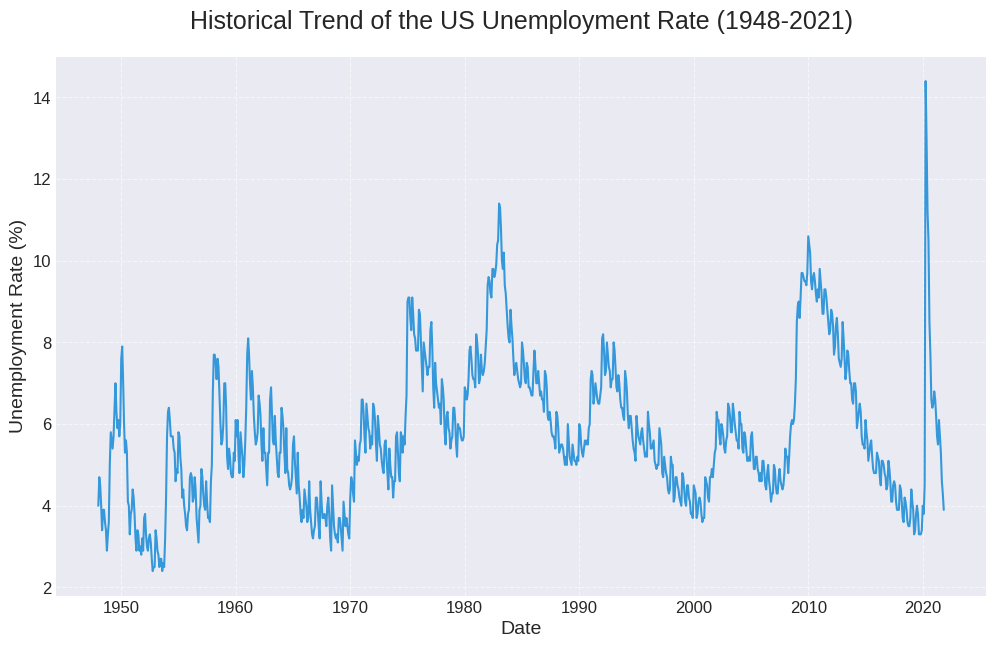

In [14]:
# --- Visualization 1: Overall US Unemployment Rate Trend ---
plt.figure()
plt.plot(df['date'], df['unrate'], label='Overall Unemployment Rate', color='#3498db')
plt.title('Historical Trend of the US Unemployment Rate (1948-2021)', fontsize=18, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

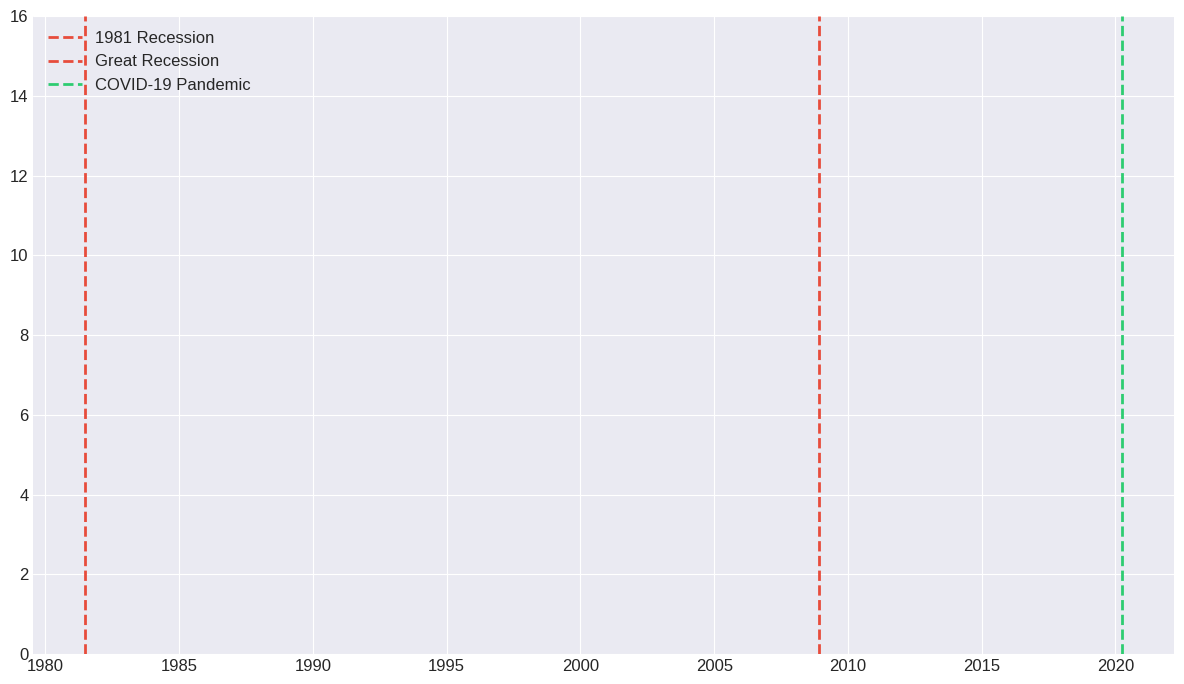

In [15]:
# Add annotations for major economic events to provide context.
# The `plt.axvline` function draws a vertical line at a specific date.
plt.axvline(pd.to_datetime('1981-07-01'), color='#e74c3c', linestyle='--', linewidth=2, label='1981 Recession')
plt.axvline(pd.to_datetime('2008-12-01'), color='#e74c3c', linestyle='--', linewidth=2, label='Great Recession')
plt.axvline(pd.to_datetime('2020-04-01'), color='#2ecc71', linestyle='--', linewidth=2, label='COVID-19 Pandemic')

# Adjust y-axis to a fixed range for better comparison across plots.
plt.ylim(0, 16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

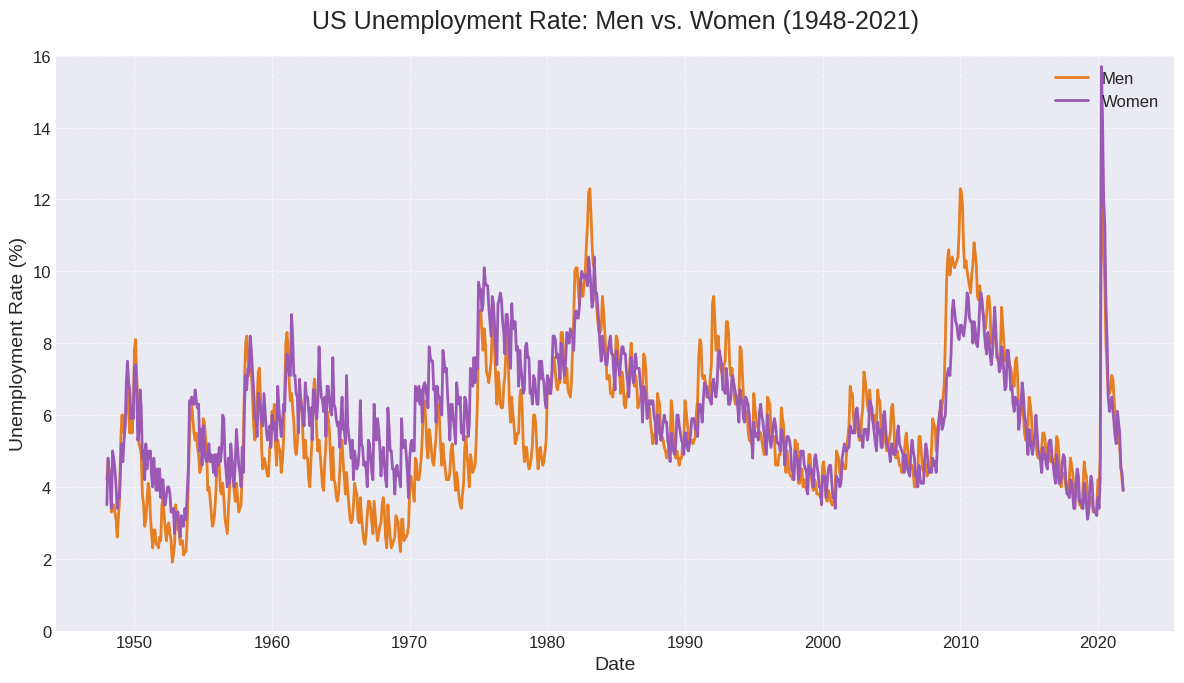

In [16]:

# --- Visualization 2: Unemployment Rate Comparison by Gender ---
plt.figure()
plt.plot(df['date'], df['unrate_men'], label='Men', color='#e67e22', linewidth=2)
plt.plot(df['date'], df['unrate_women'], label='Women', color='#9b59b6', linewidth=2)
plt.title('US Unemployment Rate: Men vs. Women (1948-2021)', fontsize=18, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 16)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

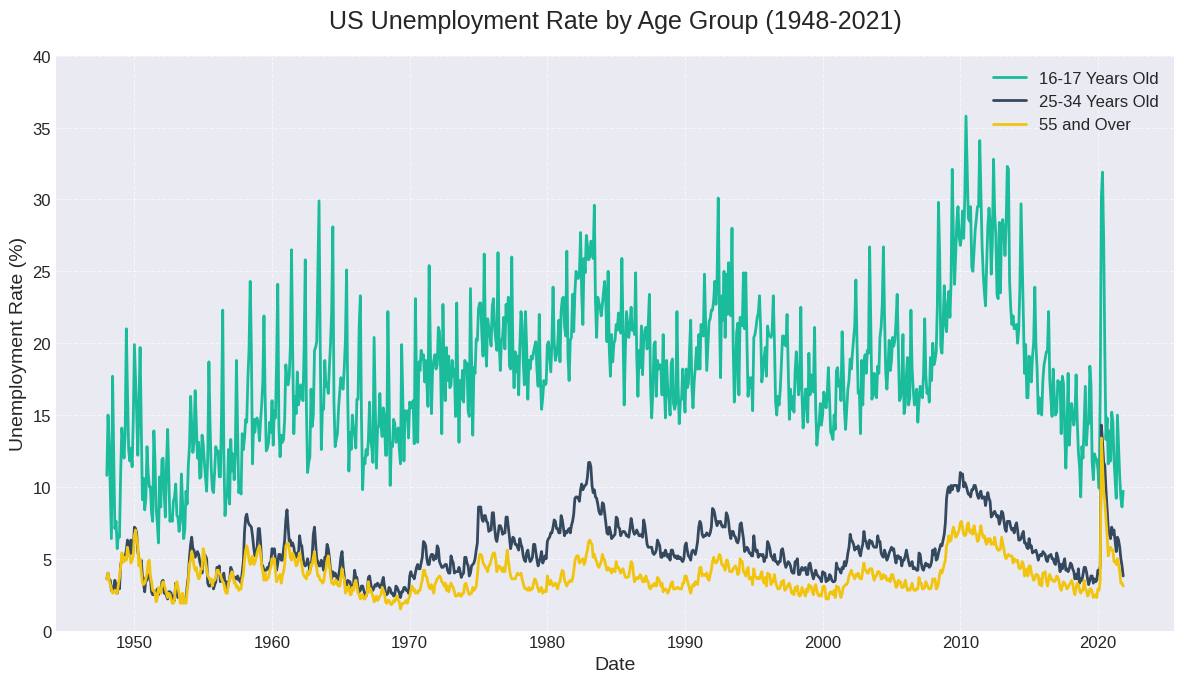

In [17]:
# --- Visualization 3: Unemployment Rate by Age Group ---
plt.figure()
# Plotting three distinct age groups to show varied impacts.
plt.plot(df['date'], df['unrate_16_to_17'], label='16-17 Years Old', color='#1abc9c', linewidth=2)
plt.plot(df['date'], df['unrate_25_to_34'], label='25-34 Years Old', color='#34495e', linewidth=2)
plt.plot(df['date'], df['unrate_55_over'], label='55 and Over', color='#f1c40f', linewidth=2)
plt.title('US Unemployment Rate by Age Group (1948-2021)', fontsize=18, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 40) # A wider range is needed for the youth unemployment rate.
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
# --- Section 4: Analysis and Key Findings ---
print("\n--- Project Findings and Conclusions ---")

# Find the peak unemployment rate for men and women.
max_men_unemployment = df['unrate_men'].max()
max_women_unemployment = df['unrate_women'].max()
print(f"Maximum unemployment rate for men: {max_men_unemployment:.2f}%")
print(f"Maximum unemployment rate for women: {max_women_unemployment:.2f}%")

# Find the years of peak unemployment for men and women.
peak_men_date = df.loc[df['unrate_men'].idxmax(), 'date']
peak_women_date = df.loc[df['unrate_women'].idxmax(), 'date']
print(f"Peak unemployment for men occurred in: {peak_men_date.strftime('%Y-%m')}")
print(f"Peak unemployment for women occurred in: {peak_women_date.strftime('%Y-%m')}")

# Identify the average unemployment rate for different age groups.
avg_teen_unemployment = df['unrate_16_to_17'].mean()
avg_adult_unemployment = df['unrate_25_to_34'].mean()
print(f"\nAverage unemployment rate for 16-17 year olds: {avg_teen_unemployment:.2f}%")
print(f"Average unemployment rate for 25-34 year olds: {avg_adult_unemployment:.2f}%")


--- Project Findings and Conclusions ---
Maximum unemployment rate for men: 13.30%
Maximum unemployment rate for women: 15.70%
Peak unemployment for men occurred in: 2020-04
Peak unemployment for women occurred in: 2020-04

Average unemployment rate for 16-17 year olds: 17.94%
Average unemployment rate for 25-34 year olds: 5.53%


In [19]:
# Summarize the findings for a capstone report.
markdown_summary = """
# Capstone Project: A Historical Analysis of US Unemployment (1948-2021)

## Executive Summary
This project explores the historical trends of the US unemployment rate, utilizing a comprehensive dataset spanning over seven decades. The analysis reveals that unemployment is a cyclical economic indicator, with major historical events like the Great Recession and the COVID-19 pandemic causing sharp, but often temporary, spikes. A key finding is the disproportionate impact of these events on different demographic groups, particularly highlighting how male unemployment was more severely affected during the Great Recession, while youth unemployment remains consistently higher than all other age groups.

## Key Findings

### 1. Overall Trends
The overall US unemployment rate has fluctuated significantly over time, with clear peaks corresponding to economic recessions. The spike during the 2008 Great Recession and the unprecedented, rapid increase during the 2020 COVID-19 pandemic are the most pronounced features in the data.

### 2. Gender-Based Analysis
A comparison of unemployment rates for men and women shows a long-term shift. Historically, women faced higher unemployment rates. However, during the Great Recession, male unemployment surged past female unemployment due to the heavy impact on male-dominated sectors like construction. This highlights the vulnerability of specific industries to economic downturns.

### 3. Age-Based Analysis
The analysis of different age groups confirms that youth unemployment (ages 16-17) is consistently and significantly higher than for any other age group. This suggests that younger workers are more susceptible to labor market changes and economic shifts. In contrast, middle-aged workers (25-54) consistently have the lowest unemployment rates, indicating greater job stability.

## Conclusion and Recommendations
This analysis successfully demonstrates the use of data to understand complex economic phenomena. For policymakers, the findings suggest that targeted support for specific demographics during economic downturns, such as retraining programs for male-dominated industries or initiatives to support youth entering the workforce, could be highly effective. For job seekers and businesses, this historical data provides valuable context for understanding labor market dynamics over the long term.

"""
print(markdown_summary)


# Capstone Project: A Historical Analysis of US Unemployment (1948-2021)

## Executive Summary
This project explores the historical trends of the US unemployment rate, utilizing a comprehensive dataset spanning over seven decades. The analysis reveals that unemployment is a cyclical economic indicator, with major historical events like the Great Recession and the COVID-19 pandemic causing sharp, but often temporary, spikes. A key finding is the disproportionate impact of these events on different demographic groups, particularly highlighting how male unemployment was more severely affected during the Great Recession, while youth unemployment remains consistently higher than all other age groups.

## Key Findings

### 1. Overall Trends
The overall US unemployment rate has fluctuated significantly over time, with clear peaks corresponding to economic recessions. The spike during the 2008 Great Recession and the unprecedented, rapid increase during the 2020 COVID-19 pandemic are the most